In [1]:
import numpy as np     
import matplotlib.pyplot as plt  
import pandas as pd
import math
from scipy import stats    
from iminuit import Minuit
import sys    
import glob


sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax 

exp_all = glob.glob('exp_*.txt')

for i in range(len(exp_all)):
    exp_all[i] = np.loadtxt(exp_all[i])


In [2]:
def extract_data(data):
    t = []
    s = []

    for point in range(len(data)):
        t_data_points = data[point][0]
        t.append(t_data_points)
    
        s_data_points = data[point][1]
        s.append(s_data_points)
        
        
        
    x = []
        
    
    # Define the start and end of the interval 
    start = 0
    end = len(s)


    k = 0
    
    for k in range(start, end):
        if s[k] >= 2.00000000000:

            if s[k] <= 2.00000000000:
                break
                
            x.append(k)
            

    x_array = np.array(x)


    slice_sizes = []
    slices = []
    
    for i in range(len(x_array)-1):
        if x_array[i] + 1 != x_array[i+1]:
            #print(i)
            slice_sizes.append(i)



    søjle1 = x_array[:slice_sizes[0]+1]
    søjle2 = x_array[1 + slice_sizes[0]:slice_sizes[1]+1]
    søjle3 = x_array[1 + slice_sizes[1]:slice_sizes[2]+1]
    søjle4 = x_array[1 + slice_sizes[2]:slice_sizes[3]+1]
    søjle5 = x_array[1 + slice_sizes[3]:]


    # Extract the middle indexes of each of the søjler
    middle1 = math.floor((len(søjle1) - 1)/2)
    middle2 = len(søjle1) + math.floor((len(søjle2) - 1)/2)
    middle3 = len(søjle1) + len(søjle2) + math.floor((len(søjle3) - 1)/2)
    middle4 = len(søjle1) + len(søjle2)+ len(søjle3) + math.floor((len(søjle4) - 1)/2)
    middle5 = len(søjle1) + len(søjle2)+ len(søjle3) + len(søjle4) + math.floor((len(søjle5) - 1)/2)

       
    t_results = np.array([t[x_array[middle1]], t[x_array[middle2]], t[x_array[middle3]], 
                          t[x_array[middle4]], t[x_array[middle5]]])
    s_results = np.array([s[x_array[middle1]], s[x_array[middle2]], s[x_array[middle3]], 
                          s[x_array[middle4]], s[x_array[middle5]]])
   

    
    #plt.plot(t,s)
    #plt.show()
        
    return t_results, s_results



In [3]:
def quadratic_model(x, a, b, c):
    return 1/2*a*x**2 + b*x + c


In [4]:
results_t = []
results_s = []


for i in range(len(exp_all)):
    t, s = extract_data(exp_all[i])
    results_t.append(t)
    results_s.append(s) 
    


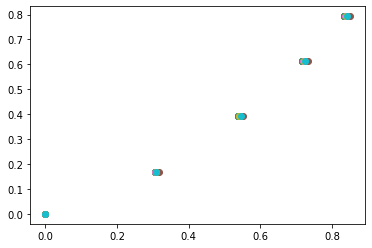

In [5]:
## Beregner afstanden mellem gates
df_values = pd.read_pickle('values.pkl')
df_positions = pd.read_pickle('positions.pkl')
df_measurements = pd.read_pickle('measurements.pkl')


df_positions
x = df_positions[0].values
sx = df_positions[1].values


s_data = (np.abs(np.array(x)-x[0])) * 0.01 # Overvej om det er den rigtige enhed


## Definer ting til plot
N_exp = len(exp_all)
N_measurements = 5 * len(exp_all)# Fordi 5 gates


sy = 2*0.01 ## SKAL ÆNDRES BARE FOR TEST!!! måske spredningen i y-værdierne

Ball_Chi2 = np.zeros(N_exp)
Ball_Prob = np.zeros(N_exp)

s_matrix = []
t_matrix = []

# Find t_data
for iexp in range(N_exp):
    exp_results_t = results_t[iexp]
    t_data = np.abs(np.array(exp_results_t) - exp_results_t[0]) # sikrer at alle starter samme sted
    
    plt.scatter(t_data[0:N_exp], s_data) ## Vi skal lige tilføje labels på et tidspunkt + akser

    
    t_matrix.append(t_data)
    s_matrix.append(s_data)


In [6]:
for i in range(len(t_matrix)):
    print(t_matrix[i])
    
t_error = [0, 0.01125, 0.0075, 0.01625, 0.00875]

[0.      0.3075  0.54125 0.72125 0.84   ]
[0.      0.3075  0.54125 0.72125 0.83875]
[0.      0.30625 0.53875 0.7175  0.835  ]
[0.      0.30625 0.53875 0.7175  0.83375]
[0.      0.3075  0.54    0.71875 0.835  ]
[0.      0.3075  0.54125 0.72    0.83625]
[0.      0.30625 0.53875 0.7175  0.83375]
[0.      0.305   0.5375  0.71625 0.83375]
[0.      0.30625 0.53875 0.7175  0.83375]
[0.      0.305   0.53875 0.7175  0.83375]
[0.      0.30625 0.53875 0.7175  0.83375]
[0.      0.3075  0.54125 0.7225  0.84   ]
[0.      0.30625 0.53875 0.7175  0.83375]
[0.      0.30875 0.5425  0.7225  0.84   ]
[0.      0.3075  0.54125 0.72125 0.83875]
[0.      0.31625 0.55125 0.7325  0.85   ]
[0.      0.30625 0.54    0.71875 0.83625]
[0.      0.31    0.54375 0.72375 0.8425 ]
[0.      0.3075  0.54125 0.7225  0.84   ]
[0.     0.31   0.545  0.725  0.8425]


In [7]:
## OBS den fitter kun til sidste y-værdi lige pt.
chi2fit = Chi2Regression(quadratic_model, t_matrix, s_matrix, sy)
    
minuit_chi2 = Minuit(chi2fit, a=6.5, b=2, c=1)
minuit_chi2.errordef = 1.0 
minuit_chi2.migrad()         
    


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.034                      │              Nfcn = 62               │
│ EDM = 4.72e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.51    │   0.06    │            │            │         │         │       │
│ 1 │ b    │   0.313   │   0.024   │            │            │         │         │       │
│ 2 │ c    │   0.000   │   0.004   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │   0.00306  -0.00127  0.000122 │
│ b │  -0.00127  0.000576 -7.24e-05 │
│ c │  0.000122 -7.24e-05  1.92e-05 │
└───┴───────────────────────────────┘

In [8]:
a,b,c = minuit_chi2.values[:]   # The fitted values of the parameters


Chi2Qua = minuit_chi2.fval # the chi2 value
NvarQua = 3                      # Number of variables (a,b,c)
NdofQua = N_measurements - NvarQua   # Number of degrees of freedom
ProbQua =  stats.chi2.sf(Chi2Qua, NdofQua) # The chi2 probability given N_DOF degrees of freedom


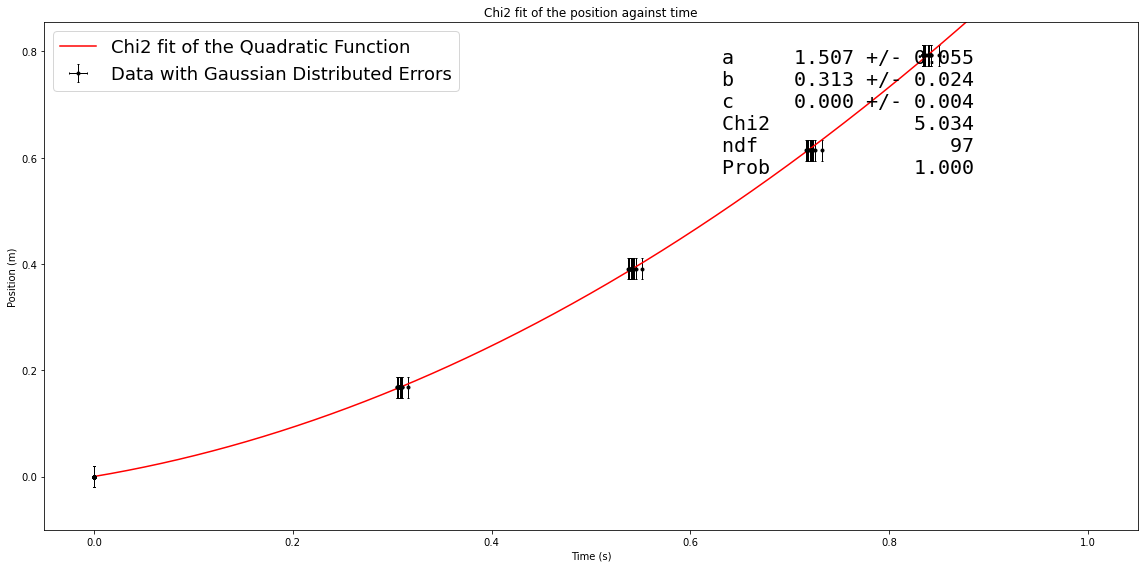

In [9]:
# Create just a single figure and axes, along with a histogram with uncertainties:
xmin, xmax = 0, 1
x = np.array(t_matrix).flatten()
y = np.array(s_matrix).flatten()


fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Data with Gaussian Distributed Errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="Time (s)", 
       ylabel="Position (m)",  
       title="Chi2 fit of the position against time",
       ylim=[-0.1,None])

# Adding fit function to plot:
x_axis = np.linspace(xmin, xmax, 1000)
ax.plot(x_axis, quadratic_model(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit of the Quadratic Function') 

# Adding fit results to plot:
d = {'a':   [minuit_chi2.values['a'], minuit_chi2.errors['a']],
     'b':       [minuit_chi2.values['b'], minuit_chi2.errors['b']],
     'c':       [minuit_chi2.values['c'], minuit_chi2.errors['c']],
     'Chi2':     Chi2Qua,
     'ndf':      NdofQua,
     'Prob':     ProbQua,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
ax.legend(loc='upper left', fontsize=18); 
fig.tight_layout()

In [10]:
A = 12.635
R = 14.828*0.001
d = 6.246*0.001
acc = 1.507

def calculate_g(a, A, R, d):
    g = (a/np.sin(np.deg2rad(A)))*(1+(2/5)*(R**2/(R**2-(d/2)**2)))
    return g


g = calculate_g(acc, A, R, d)

print(g)

9.773186974039257


# Error Propagation

In [11]:
A_err_stat = 0.034
R_err_stat = 0.055*0.001
d_err_stat = 0.002*0.001

A_err_sys = 0.5
R_err_sys = 0.02*0.001
d_err_sys = 0.02*0.001

def error_contribution_a(A, R, d, a_err):
    
    contribution = (1 / np.sin(np.deg2rad(A)))*(1 + (2/5)*(R**2 / (R**2 - (d/2)**2)))*a_err
    
    return contribution

def error_contribution_A(a, R, d, A_err):
    
    contribution = (a*np.cos(np.deg2rad(A)) / (np.sin(np.deg2rad(A)))**2) * (1 + (2/5)*(R**2 / (R**2 - (d/2)**2)))*A_err
    
    return contribution

def error_contribution_R(a, A, d, R_err):
    
    contribution = 2*a*R/(5*np.sin(np.deg2rad(A))*(R**2 - (d/2)**2))*R_err
    
    return contribution
    
def error_contribution_d(a, A, R, d_err):
    
    contribution = (4*a*R**2) / (5* np.sin(np.deg2rad(A))*(R**2 - (d/2)**2))*d_err
    
    return contribution

print(f'The contribution from a to the error is: {(error_contribution_a(A, R, d, 0.055))**2:.3f}')
print(f'The contribution from A to the error is: {error_contribution_A(a, R, d, A_err_stat)**2:.3f}')
print(f'The contribution from R to the error is: {error_contribution_R(a, A, d, R_err_stat)**2:.5f}')
print(f'The contribution from d to the error is: {error_contribution_d(a, A, R, d_err_stat)**2:.12f}')

print('\n')
print(f'The sys contribution from A to the error is: {error_contribution_A(a, R, d, A_err_sys)**2:.3f}')
print(f'The sys contribution from R to the error is: {error_contribution_R(a, A, d, R_err_sys)**2:.6f}')
print(f'The sys contribution from d to the error is: {error_contribution_d(a, A, R, d_err_sys)**2:.10f}')



The contribution from a to the error is: 0.127
The contribution from A to the error is: 2.196
The contribution from R to the error is: 0.00011
The contribution from d to the error is: 0.000000000133


The sys contribution from A to the error is: 474.992
The sys contribution from R to the error is: 0.000015
The sys contribution from d to the error is: 0.0000000133


In [22]:
g_stat_contri = np.sqrt(0.127+2.196+0.00011+0.000000000133)
print('The statistical contribution to the error on g is:', g_stat_contri)

g_sys_contri = np.sqrt(474.992+0.000015+0.0000000133)
print('The systematic contribution to the error on g is:', g_sys_contri)

The statistical contribution to the error on g is: 1.5241751868249922
The systematic contribution to the error on g is: 21.79431152877512


In [16]:
# For both the pendulum and the ball on incline, we have the following 
# variables: L, T, a, R, d
# The value and the uncertainty for each variable is defined here:

muL = 1.0
sigL = 1.0
muT = 1.0
sigT = 1.0

mua = 1.507
siga = 0.055
muR = R
sigR = R_err_stat
mud = d
sigd = d_err_stat
muA = A*180/3.141592653589793          # A for angle
sigA = A_err_stat*180/3.141592653589793

# Define experiment: pendulum or incline
mode = 'incline'

In [17]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LateX using Ipython dysplay system
     
      Parameters
    --------------
    args : tuple
        What to print (in LateX math mode)
    kwargs : dict
        optional keywords to pass to 'display'
     """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    

In [14]:
# Ipmort SymPy
from sympy import *

# Define variables and print
L,T,a1,R,d,A,g = symbols("L, T, a, R, d, A, g")
dL,dT,da,dR,dd,dA,dg = symbols("sigma_L, sigma_T, sigma_a, sigma_R, sigma_d, sigma_A, sigma_g")

# Pendulum and incline
# Define relation

if mode == 'pendulum':
# Pendulum
    g = L*((2*pi)/T)**2
if mode == 'incline':
# Incline
    g = (a1/sin(A))*(1+(2/5)*(R**2/(R**2-(d/2)**2)))

lprint(latex(Eq(symbols('g'), g)))


<IPython.core.display.Latex object>

In [18]:
# Calculate uncertainty and print
# Pendulum
if mode == 'pendulum':
    dg = sqrt((g.diff(L)*dL)**2 + (g.diff(T)*dT)**2)
# Incline
if mode == 'incline':
    dg = sqrt((g.diff(a1)*da)**2 + (g.diff(A)*dA)**2 + (g.diff(R)*dR)**2 + (g.diff(d)*dd)**2)

# Turn expression into numerical functions
if mode == 'pendulum':
    fg = lambdify((L,T), g)
    fdg = lambdify((L,dL,T,dT),dg)

if mode == 'incline':
    fg = lambdify((a1,A,R,d), g)
    fdg = lambdify((a1,da,A,dA,R,dR,d,dd),dg)

# Define values and their errors
vL, vdL = muL, sigL
vT, vdT = muT, sigT
va, vda = mua, siga
vR, vdR = muR, sigR
vd, vdd = mud, sigd
vA, vdA = muA, sigA

# Numerically evaluate expressions and print
if mode == 'pendulum':
    vg = fg(vL,vT)
    vdg = fdg(vL,vdL,vT,vdT)
if mode == 'incline':
    vg = fg(va,vA,vR,vd)
    vdg = fdg(va,vda,vA,vdA,vR,vdR,vd,vdd)

lprint(fr'g = ({vg:.1f} \pm {vdg:.1f})\,\mathrm{{m}}')

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable sin method